# Clustering Countries 
### - OBJECTIVE
- To categorise countries using socio-eonomic and health factors that determine the overall development of the country
- Then, based upon the countries which have been categorised figure out the countries that are in **need of health and socio - economic help.**

In [183]:
%matplotlib inline

In [184]:
import pandas as pd
import numpy as np
import math
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
pd.set_option('display.max_colwidth', None)

In [186]:
df_raw = pd.read_csv(r"Country-data.csv")

In [187]:
df_raw

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### The above dataset corresponds to an **unsupervised learning** problem as there is no target feature involved.
- The model employed in forming clusters is going to be **K-Means Clustering**.
- **'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp'** are all the features that will form the basis of our clusters.

In [188]:
df_raw.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [189]:
data_dict = pd.read_csv(r"data-dictionary.csv")

In [190]:
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [191]:
df_raw.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [192]:
# pearson coeff of correlation
df_raw.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


# Missing Values

In [193]:
df_raw.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [194]:
d = {}  # no of nans, nones, etc.
for c in df_raw.columns:
    data = df_raw[c]
    d[c] = 0
    for k in data:
        if(k == np.nan or k == None or k == 0):
            d[c] = d.get(c, 0)+1
print("Missing values for the data set\n")
for i, j in d.items():
    print(i, ":", j)

Missing values for the data set

country : 0
child_mort : 0
exports : 0
health : 0
imports : 0
income : 0
inflation : 0
life_expec : 0
total_fer : 0
gdpp : 0


- The above code shows that there are **no missing** values in the given data set.
- We can now go further with the analysis of our features of the data set.

# Analysis
- Since the objective of our cluster analysis is to group countries based on their respective develpment rates, a good way to **define development of a country** can be on the basis of **health, income and GDP per capita**.
- This is derived from the fact that if the **GDP per capita is high** it inturn means that **exports are high** and **imports are lower**
- Also, if the **health expenditure** of a country is high **a drop in mortality rate** is bound to follow.
- - Similarly, in a developed country, **GDP per capita is expected to be high** if **fertility rate is high** and **mortality rate is low**

## Health and Income

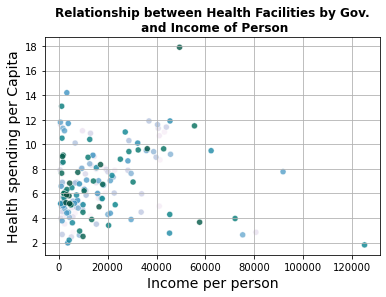

In [195]:
sns.scatterplot(x=df_raw.income, y=df_raw.health,
                hue=df_raw.country, palette='PuBuGn', legend=False, alpha=0.8)
plt.grid()
plt.xlabel("Income per person", fontsize=14)
plt.ylabel("Health spending per Capita", fontsize=14)
plt.title("Relationship between Health Facilities by Gov.\n and Income of Person",
          fontweight='bold')
plt.savefig(r'EDA scatter Plots/health_and_income.png', dpi=200)

- From the above plot it is noted that although a country may have a *lower* health expenditure by the Gov. but if the average income of the country is *high* then they would not be much dependent on the Gov. provided facilities and may look at private options.
- Thus a new column **income and health** is created which is formed by multiplying the income of a person with the health expenditure spent per capita and the plot with **GDP per capita** shows an almost linear relationship.

In [196]:
df_raw['income_and_health'] = df_raw['health']*df_raw['income']

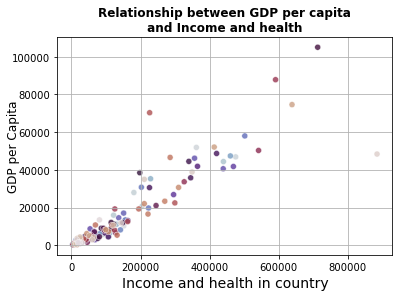

In [197]:
sns.scatterplot(x=df_raw.income_and_health, y=df_raw.gdpp,
                hue=df_raw.country, palette='twilight', legend=False, alpha=0.8)
plt.grid()
plt.xlabel("Income and health in country", fontsize=14)
plt.ylabel("GDP per Capita", fontsize=12, labelpad=-8)
plt.title("Relationship between GDP per capita\n and Income and health ",
          fontweight='bold')
plt.savefig(r'EDA scatter Plots/GDPp_income_health.png', dpi=200)

- This means, the variable $income\times health$ is a good indicator of the development of a country

# Child Mortality and Life Expectancy

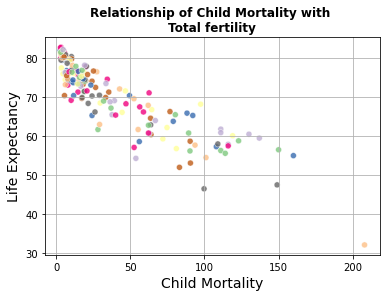

In [198]:
sns.scatterplot(x=df_raw.child_mort, y=df_raw.life_expec,
                hue=df_raw.country, palette='Accent', legend=False, alpha=0.8)
plt.title("Relationship of Child Mortality with \nTotal fertility",
          fontweight='bold')
plt.xlabel("Child Mortality", fontsize=14)
plt.ylabel("Life Expectancy", fontsize=14)
plt.grid()
plt.savefig(r'EDA scatter Plots/fert_and_life_expec.png', dpi=200)

- This relationship is an unsual negatively correlated relationship which highlights the fact that the **life expectancy is high** when **child mortality is low**, and vice versa.
- Moreover, the second graph shows clearly that the mortality rate and the life expectancy **increases** with the increasing health expenditure and increasing income.
- So, a better reflection of the country's development and health industry is demonstrated with ia high life expectancy and low child mortality rate. 

In [199]:
df_raw['expec_by_mortality'] = df_raw['life_expec'] / df_raw['child_mort']

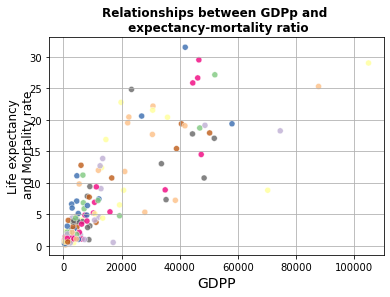

In [200]:
sns.scatterplot(x=df_raw.gdpp, y=df_raw.expec_by_mortality,
                hue=df_raw.country, palette='Accent', legend=0, alpha=0.8)
plt.xlabel("GDPP", fontsize=14)
plt.ylabel("Life expectancy\n and Mortality rate", fontsize=12, labelpad=-6)
plt.title("Relationships between GDPp and \n expectancy-mortality ratio",
          fontweight='bold')
plt.grid()
plt.savefig(r'EDA scatter Plots/GDPp_expec_and_mort.png', dpi=200)

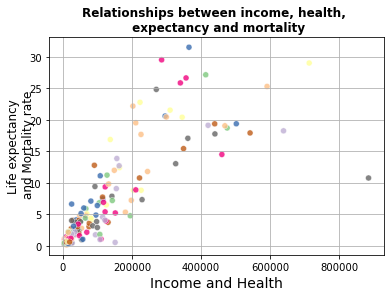

In [201]:
sns.scatterplot(x=df_raw.income_and_health, y=df_raw.expec_by_mortality,
                hue=df_raw.country, palette='Accent', legend=0, alpha=0.8)
plt.xlabel("Income and Health", fontsize=14)
plt.ylabel("Life expectancy\n and Mortality rate", fontsize=12, labelpad=-6)
plt.title("Relationships between income, health, \n expectancy and mortality",
          fontweight='bold')
plt.grid()
plt.savefig(
    r'EDA scatter Plots/income_health_expec_and_mort.png', dpi=200)

## Reducing Attributes
- (Income, health), (exports,imports) and (total_fertility,child_mortality) attributes are removed
- The interaction terms which are relevant to the developments profile of the country have been added

In [202]:
df_raw = df_raw.drop(['child_mort','life_expec', 'income', 'health'], axis=1)
df_raw.describe()

,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,41.108976,46.890215,7.781832,2.947964,12964.155689,123673.440419,6.698585
std,27.412010,24.209589,10.570704,1.513848,18328.704809,154521.492565,7.553877
min,0.109000,0.065900,-4.210000,1.150000,231.000000,3534.240000,0.154327
25%,23.800000,30.200000,1.810000,1.795000,1330.000000,17516.400000,1.041848
50%,35.000000,43.300000,5.390000,2.410000,4660.000000,65041.500000,3.837438
75%,51.350000,58.750000,10.750000,3.880000,14050.000000,152947.000000,9.231874
max,200.000000,174.000000,104.000000,7.490000,105000.000000,884260.000000,31.538462


In [203]:
df_raw.corr()

,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
exports,1.000000,0.737381,-0.107294,-0.320011,0.418725,0.335731,0.401795
imports,0.737381,1.000000,-0.246994,-0.159048,0.115498,0.080558,0.195955
inflation,-0.107294,-0.246994,1.000000,0.316921,-0.221631,-0.258342,-0.325448
total_fer,-0.320011,-0.159048,0.316921,1.000000,-0.454910,-0.507023,-0.600884
gdpp,0.418725,0.115498,-0.221631,-0.454910,1.000000,0.921149,0.812393
income_and_health,0.335731,0.080558,-0.258342,-0.507023,0.921149,1.000000,0.815139
expec_by_mortality,0.401795,0.195955,-0.325448,-0.600884,0.812393,0.815139,1.000000


# Making the model 
- KMeans algorithm is imported from skleran library and StandardScaler is used for the scaling of data.
- Scaling of data is an important here as the K- means algorithm is a distance based algorithm and **varied distance values** can influence the results.

In [204]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

- Country name is dropped from the data set as it bears **no real significance to the development of a country**
- Moreover,it is a **categorical variable** which otherwise also could not have been used as a distance metric, even if it was one-hot encoded.

In [205]:
df = df_raw.drop('country', axis=1)

In [206]:
df.head(n=2)

,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
0,10.0,44.9,9.44,5.82,553,12203.8,0.623060
1,28.0,48.6,4.49,1.65,4090,65041.5,4.596386


### Scale and save dataframe

In [207]:
st = StandardScaler()
train = pd.DataFrame(st.fit_transform(df), columns=df.columns)

In [208]:
train.head()

,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
0,-1.138280,-0.082455,0.157336,1.902882,-0.679180,-0.723556,-0.806711
1,-0.479658,0.070837,-0.312347,-0.859973,-0.485623,-0.380583,-0.279131
2,-0.099122,-0.641762,0.789274,-0.038404,-0.465376,-0.453598,-0.517364
3,0.775381,-0.165315,1.387054,2.128151,-0.516268,-0.693624,-0.822382
4,0.160668,0.497568,-0.601749,-0.541946,-0.041817,-0.055177,0.100611


In [209]:
train.to_csv(r"final_country_data.csv")

# Metrics 
- **INERTIA** and **Davies- Bouldin Index** were used as the metrics to measure the optimality of clusters.
- Both the metrics are should be minimized for **formation of optimal** clusters.

# Inertia 
- It is defined as the **intracluster distance**  for the cluster.
- The attribute **model.inertia_** provides the total inertia of the model summed up over **all the clusters**

In [210]:
train = pd.read_csv(r"final_country_data.csv").drop(['Unnamed: 0'], axis=1)

In [211]:
train.head(n=2)

,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
0,-1.138280,-0.082455,0.157336,1.902882,-0.679180,-0.723556,-0.806711
1,-0.479658,0.070837,-0.312347,-0.859973,-0.485623,-0.380583,-0.279131


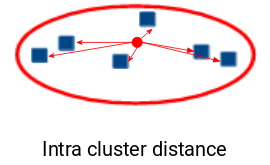

In [212]:
Image(r"Metrics and Score Plots/inertia_img.png")

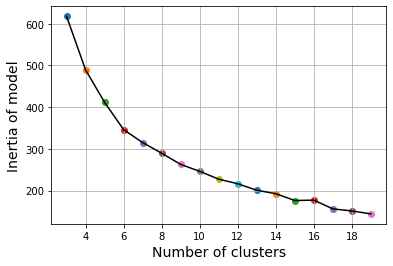

In [213]:
inert = []
for i in range(3, 20):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=400)
    km.fit(train)
    plt.scatter(i, km.inertia_)
    inert.append(km.inertia_)
plt.plot([i for i in range(3, 20)], inert, color='black')
plt.grid()
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Inertia of model", fontsize=14)
plt.savefig(r'Metrics and Score Plots/inertia.png', dpi=200)

# Davies - Bouldin Index
- This index looks to **minimize** the ratio of **maximum (intracluster-distances with inter-cluster distances)** for **all the pairs of clusters averaged over all clusters.**
- It is import from **sklearn.metrics** as **davies_bouldin_score**
- A detailed description is provided **in the pdf file attached.**

In [214]:
from sklearn.metrics import davies_bouldin_score

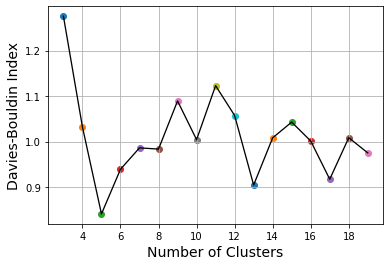

In [215]:
dbi = []
for i in range(3, 20):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=400)
    km.fit(train)
    plt.scatter(i, davies_bouldin_score(train, km.labels_))
    dbi.append(davies_bouldin_score(train, km.labels_))
plt.plot([i for i in range(3, 20)], dbi, color='black', linewidth=1.3)
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Davies-Bouldin Index", fontsize=14)
plt.grid()
plt.savefig(r'Metrics and Score Plots/davies_bouldin_score.png', dpi=200)

- We see that the **DBI** is reasonably low for number of clusters = 6,7.


### Plotting Product of DBI and Inertia

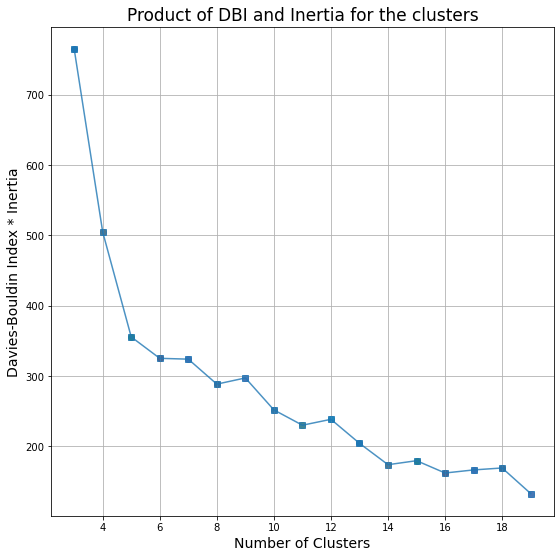

In [216]:
dbi_inertia = []
plt.figure(figsize=(9, 9))

for i in range(3, 20):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=400)
    km.fit(train)

    dbi = davies_bouldin_score(train, km.labels_)
    inertia = km.inertia_
    dbi_inertia.append(dbi*inertia)
    plt.scatter(i, dbi*inertia)


plt.plot([i for i in range(3, 20)], dbi_inertia,
         marker='s', alpha=0.8, linewidth=1.5)
plt.title('Product of DBI and Inertia for the clusters', fontsize=17)
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Davies-Bouldin Index * Inertia", fontsize=14)
plt.grid()
plt.savefig(r'Metrics and Score Plots/DBI_and_inertia.png', dpi=200)

- Here, we see that at 7 number of clusters, we see that the product of DBI and inertia is reasonably low and having lesser number of clusters also reduces the computational time complexity.

# Final Model
- The final model that is used has-
 - **Clusters**- 7
 - **Initialization Algorithm**- KMeans ++
 - **Max- Iterations**- 400
 - **Distance Metric**- Euclidean

In [217]:
km = KMeans(n_clusters=7, init='k-means++', max_iter=400)
km.fit(train)

KMeans(max_iter=400, n_clusters=7)

In [218]:
davies_bouldin_score(train, km.labels_)

0.9873715634858716

In [219]:
km.inertia_

314.9062520005271

In [220]:
km.labels_

array([0, 4, 4, 0, 6, 4, 4, 2, 2, 4, 6, 6, 4, 6, 6, 2, 6, 0, 3, 4, 6, 3,
       4, 6, 6, 0, 0, 3, 0, 2, 3, 0, 0, 4, 4, 4, 0, 0, 3, 4, 0, 6, 2, 2,
       2, 4, 4, 4, 4, 3, 0, 6, 3, 2, 2, 4, 0, 4, 2, 0, 2, 4, 4, 0, 0, 3,
       3, 6, 2, 4, 4, 4, 0, 2, 2, 2, 4, 2, 3, 4, 0, 3, 6, 3, 3, 6, 6, 3,
       3, 6, 6, 1, 6, 0, 0, 6, 6, 0, 1, 3, 6, 3, 6, 4, 6, 4, 0, 4, 3, 4,
       2, 2, 0, 5, 2, 6, 0, 6, 3, 4, 4, 6, 2, 2, 4, 4, 0, 3, 4, 0, 6, 6,
       0, 1, 6, 2, 3, 4, 2, 2, 4, 4, 0, 4, 2, 2, 3, 0, 6, 0, 3, 3, 6, 4,
       6, 0, 6, 6, 2, 2, 4, 4, 3, 4, 6, 0, 0], dtype=int32)

In [221]:
clusters = pd.DataFrame(km.cluster_centers_, columns=train.columns)

In [222]:
label_dict = dict()
for i, j in zip(km.labels_, df_raw.country):
    if(i not in label_dict):
        label_dict[i] = []
    label_dict[i].append(j)
print("CLUSTERED COUNTRIES")
for k, j in label_dict.items():
    print("Label ", k, ":", j)
    print()

CLUSTERED COUNTRIES
Label  0 : ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Iraq', 'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Sudan', 'Tanzania', 'Timor-Leste', 'Uganda', 'Yemen', 'Zambia']

Label  4 : ['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bolivia', 'Brazil', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Gabon', 'Georgia', 'Grenada', 'Guatemala', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Kazakhstan', 'Mongolia', 'Morocco', 'Myanmar', 'Nepal', 'Peru', 'Philippines', 'Romania', 'Russia', 'Saudi Arabia', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Turkey', 'Uruguay', 'Uzbekistan', 'Venezuela']

Label  6 : ['Antigua and Barbuda'

In [249]:
clusters.sort_values('income_and_health')

,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
0,-0.636209,-0.443776,0.222045,1.615373,-0.652836,-0.712060,-0.793731
5,-0.578452,-1.221785,9.129718,1.916133,-0.581936,-0.633286,-0.827647
3,0.025431,0.801168,-0.058301,0.454007,-0.548619,-0.578553,-0.663612
4,-0.435760,-0.643276,0.305191,-0.380725,-0.382863,-0.347737,-0.408434
6,0.616580,0.476142,-0.270489,-0.729733,-0.051620,-0.035295,0.147365
2,0.101862,-0.266227,-0.601355,-0.783069,1.657342,1.742016,1.747525
1,4.935673,4.548058,-0.504206,-1.038863,2.440797,1.886300,2.225600


- The cluster Data Frame is sorted according to the **income and health product**.
- According to the **cluster dataframe**, it is noted that the countries clustered around **labels 0 and 5** had the **lowest cluster income and GDP percapita**.
- It was also noted that those countries had the **highest fertility and mortality product** which made them candidates that would actually require **external socio - economic help**

# Making new Dataframe for Cluster

### - Clusters 0 and 5
- This cluster represents the **most in need countries amongst the data set**.
- This cluster is now analysed according to different variables and the **top 20** countries are extracted out of it on this basis.

In [250]:
countries = label_dict[0]

# adding nigeria too...
countries.append("Nigeria")
df_label = pd.DataFrame(columns=df_raw.columns)
df_new = pd.DataFrame(columns=df_raw.columns)
for c in df_raw.country:
    if(c in countries):
        df_label = df_label.append(df_raw.loc[df_raw.country == c])
    else:
        df_new = df_new.append(df_raw.loc[df_raw.country == c])

# Clustered Countries

In [251]:
df_label.head()

,country,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
0,Afghanistan,10.00,44.9,9.440,5.82,553,12203.8,0.623060
3,Angola,62.30,42.9,22.400,6.16,3530,16815.0,0.505042
17,Benin,23.80,37.2,0.885,5.36,758,7462.0,0.556757
25,Burkina Faso,19.20,29.6,6.810,5.87,575,9638.2,0.499138
26,Burundi,8.92,39.2,12.300,6.26,231,8862.4,0.616453


# Other countries

In [252]:
df_new

,country,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
1,Albania,28.0,48.6,4.49,1.65,4090,65041.5,4.596386
2,Algeria,38.4,31.4,16.10,2.89,4460,53793.0,2.802198
4,Antigua and Barbuda,45.5,58.9,1.44,2.13,12200,115173.0,7.456311
5,Argentina,18.9,16.0,20.90,2.37,10300,151470.0,5.227586
6,Armenia,20.8,45.3,7.77,1.69,3220,29480.0,4.049724
...,...,...,...,...,...,...,...,...
160,Uruguay,26.3,25.4,4.91,2.08,11900,142785.0,7.207547
161,Uzbekistan,31.7,28.5,16.50,2.34,1380,24634.4,1.895317
162,Vanuatu,46.6,52.7,2.62,3.50,2970,15487.5,2.157534
163,Venezuela,28.5,17.6,45.90,2.47,13500,81015.0,4.409357


In [253]:
df_label.gdpp = df_label.gdpp.astype(float, copy=True)

In [254]:
df_new.gdpp = df_new.gdpp.astype(float, copy=True)

In [255]:
df_label.describe()

,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,23.767941,35.626471,12.883088,5.399412,1072.500000,14331.775000,0.713302
std,12.552845,9.227013,17.610075,0.794771,995.546698,17299.974249,0.309826
min,2.200000,17.200000,0.885000,3.850000,231.000000,3534.240000,0.318792
25%,16.575000,29.225000,3.977500,4.782500,498.250000,6956.275000,0.500614
50%,22.500000,35.000000,9.345000,5.325000,705.000000,11797.500000,0.619756
75%,29.875000,43.150000,16.475000,5.862500,1287.500000,15544.150000,0.856471
max,62.300000,51.700000,104.000000,7.490000,4500.000000,106807.000000,1.821138


In [256]:
df_new.describe()

,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
count,133.000000,133.000000,133.000000,133.000000,133.00000,133.000000,133.000000
mean,45.542023,49.769668,6.477752,2.321278,16004.12782,151625.445113,8.228657
std,28.430884,25.976004,7.387570,0.883447,19403.30895,161509.973547,7.755544
min,0.109000,0.065900,-4.210000,1.150000,327.00000,7328.400000,0.154327
25%,27.800000,30.800000,1.440000,1.630000,3110.00000,40976.000000,2.314189
50%,39.700000,48.600000,4.220000,2.140000,7370.00000,97440.000000,4.883562
75%,54.300000,61.800000,8.920000,2.670000,21100.00000,204267.000000,12.000000
max,200.000000,174.000000,45.900000,5.210000,105000.00000,884260.000000,31.538462


# Comparison of Income and health

In [257]:
df_label.sort_values("income_and_health", ascending=1)[:12]

,country,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
31,Central African Republic,11.80,26.5,2.010,5.21,446.0,3534.24,0.318792
50,Eritrea,4.79,23.3,11.600,4.61,482.0,3777.20,1.117754
112,Niger,22.20,49.1,2.550,7.49,348.0,4200.24,0.478049
106,Mozambique,31.50,46.2,7.640,5.56,419.0,4782.78,0.539604
37,"Congo, Dem. Rep.",41.10,49.6,20.800,6.54,334.0,4817.19,0.495690
93,Madagascar,25.00,43.0,8.790,4.60,413.0,5240.30,0.977492
63,Guinea,30.30,43.2,16.100,5.34,648.0,5866.70,0.532110
36,Comoros,16.50,51.7,3.870,4.75,769.0,6359.10,0.747166
94,Malawi,22.80,34.9,12.100,5.31,459.0,6787.70,0.586740
17,Benin,23.80,37.2,0.885,5.36,758.0,7462.00,0.556757


In [258]:
print("Income and Health Statistics ")
df_new.income_and_health.describe()

Income and Health Statistics 


count       133.000000
mean     151625.445113
std      161509.973547
min        7328.400000
25%       40976.000000
50%       97440.000000
75%      204267.000000
max      884260.000000
Name: income_and_health, dtype: float64

- It is evident that the **income and health product** of the other dataframe that the **countries of this cluster** are very far behind it terms of both **income and health facilities** as the mean income and health of this cluster approximately **10%** of the other countries.

In [259]:
dat = dict()
# get 10% level
level = 0.1 * np.mean(df_new.income_and_health)

for k in df_label.income_and_health:
    if(k < level):
        dat['Less than 10%'] = dat.get('Less than 10%', 0) +1
    else:
        dat['Greater than 10%'] = dat.get('Greater than 10%', 0)+1
        
print("Data is :",dat)

Data is : {'Less than 10%': 25, 'Greater than 10%': 9}


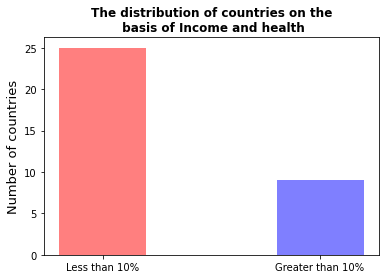

In [260]:
plt.bar([0, 0.5], [dat['Less than 10%'], dat['Greater than 10%']],
        width=0.2, alpha=0.5, color=['r','b'])
plt.xticks([0, 0.5], ['Less than 10%', 'Greater than 10%'])
plt.ylabel("Number of countries", fontsize=13)
plt.title("The distribution of countries on the\n basis of Income and health",
          fontweight='bold')
plt.savefig(r'Final Cluster Histograms/histo_income_health.png', dpi=200)

# Comparison of GDP per capita

In [261]:
df_label.sort_values("gdpp", ascending=True)[:15]

,country,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
26,Burundi,8.92,39.2,12.30,6.26,231.0,8862.40,0.616453
37,"Congo, Dem. Rep.",41.10,49.6,20.80,6.54,334.0,4817.19,0.495690
112,Niger,22.20,49.1,2.55,7.49,348.0,4200.24,0.478049
132,Sierra Leone,16.80,34.5,17.20,5.20,399.0,15982.00,0.343750
93,Madagascar,25.00,43.0,8.79,4.60,413.0,5240.30,0.977492
106,Mozambique,31.50,46.2,7.64,5.56,419.0,4782.78,0.539604
31,Central African Republic,11.80,26.5,2.01,5.21,446.0,3534.24,0.318792
94,Malawi,22.80,34.9,12.10,5.31,459.0,6787.70,0.586740
50,Eritrea,4.79,23.3,11.60,4.61,482.0,3777.20,1.117754
64,Guinea-Bissau,14.90,35.2,2.97,5.05,547.0,11815.00,0.487719


In [262]:
print("GDP per capita statistics")
(df_new.gdpp.describe())

GDP per capita statistics


count       133.00000
mean      16004.12782
std       19403.30895
min         327.00000
25%        3110.00000
50%        7370.00000
75%       21100.00000
max      105000.00000
Name: gdpp, dtype: float64

- The above statistic is derived from the **other dataframe** and highlights the **enormous disparity** between countries **in the cluster and other countries on average.**
- The mean for this dataset is **$16738$** and approximately 42 countries have a GDPP below the 10% mark of the meanother countries

In [263]:
dat = dict()

level = 0.1 * df_new.gdpp.mean()
for k in df_label.gdpp:
    if(k < level):
        dat['Less than 10%'] = dat.get('Less than 10%', 0)+1
    else:
        dat['Greater than 10%'] = dat.get('Greater than 10%', 0)+1
        
print("Data is :",dat)

Data is : {'Less than 10%': 30, 'Greater than 10%': 4}


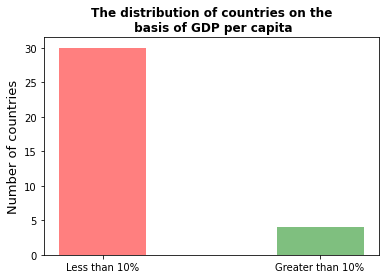

In [264]:
plt.bar([0, 0.5], [dat['Less than 10%'], dat['Greater than 10%']],
        width=0.2, alpha=0.5, color=['r', 'g'])
plt.xticks([0, 0.5], ['Less than 10%', 'Greater than 10%'])
plt.ylabel("Number of countries", fontsize=13)
plt.title("The distribution of countries on the\n basis of GDP per capita",
          fontweight='bold')
plt.savefig(r'Final Cluster Histograms/histo_GDPp.png', dpi=200)

# Comparison of Life expectancy and Child Mortality Rate

In [265]:
df_label.sort_values('expec_by_mortality')[:12]

,country,exports,imports,inflation,total_fer,gdpp,income_and_health,expec_by_mortality
31,Central African Republic,11.8,26.5,2.01,5.21,446.0,3534.24,0.318792
132,Sierra Leone,16.8,34.5,17.20,5.20,399.0,15982.00,0.343750
32,Chad,36.8,43.5,6.39,6.59,897.0,8742.90,0.376667
97,Mali,22.8,35.1,4.37,6.55,708.0,9312.60,0.434307
113,Nigeria,25.3,17.4,104.00,5.84,2330.0,26110.50,0.465385
112,Niger,22.2,49.1,2.55,7.49,348.0,4200.24,0.478049
64,Guinea-Bissau,14.9,35.2,2.97,5.05,547.0,11815.00,0.487719
37,"Congo, Dem. Rep.",41.1,49.6,20.80,6.54,334.0,4817.19,0.495690
25,Burkina Faso,19.2,29.6,6.81,5.87,575.0,9638.20,0.499138
3,Angola,62.3,42.9,22.40,6.16,3530.0,16815.00,0.505042


In [266]:
print("Fertility Rate Statistics\n")
(df_new.expec_by_mortality.describe())

Fertility Rate Statistics



count    133.000000
mean       8.228657
std        7.755544
min        0.154327
25%        2.314189
50%        4.883562
75%       12.000000
max       31.538462
Name: expec_by_mortality, dtype: float64

- Again, the statistic derived from the **other dataframe** clearly highlights the differences in **Fertility in females and Child Mortality Rate** amongst the **clustered countries** and the **other countries**.
- From the data frame it is clear that the countries of this cluster is **10 times higher than the other countries**.
- It further strengthens the conclusion that these are the countries in **need of external help**

In [267]:
dat = dict()

level = 0.1 * df_new.expec_by_mortality.mean()

for k in df_label.expec_by_mortality:
    if(k < level):
        dat['Less than 10%'] = dat.get('Less than 10%', 0)+1
    else:
        dat['Greater than 10%'] = dat.get('Greater than 10%', 0)+1
        
print("Data is :",dat)

Data is : {'Less than 10%': 23, 'Greater than 10%': 11}


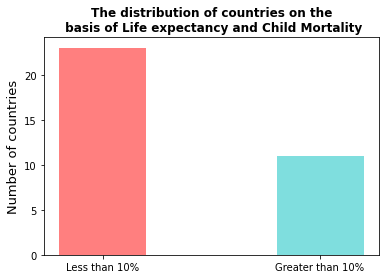

In [268]:
plt.bar([0, 0.5], [dat['Less than 10%'], dat['Greater than 10%']],
        width=0.2, alpha=0.5, color=['r', 'c'])

plt.xticks([0, 0.5],
           ['Less than 10%', 'Greater than 10%'])
plt.ylabel("Number of countries", fontsize=13)
plt.title("The distribution of countries on the\n basis of Life expectancy and Child Mortality", fontweight='bold')
plt.savefig(r'Final Cluster Histograms/histo_expec_and_mortality.png', dpi=200)

## Shortlisting countries from dataset.
- Countries are shortlisted according to the above three classifiers and then the top **10** countries are extracted from each metric.
- Then, the union of these **counrty lists** provide the most **in need countries from the dataset**

In [269]:
inc_h = list(df_label.sort_values("income_and_health").country[:10])
gdp_p = list(df_label.sort_values("gdpp").country[:10])
expec_mort = list(df_label.sort_values(
    "expec_by_mortality").country[:10])

In [270]:
print("Based on income and health:", inc_h, "\n")
print("Based on GDP per capita :", gdp_p, "\n")
print("Based on life expec by mortality :", expec_mort)

Based on income and health: ['Central African Republic', 'Eritrea', 'Niger', 'Mozambique', 'Congo, Dem. Rep.', 'Madagascar', 'Guinea', 'Comoros', 'Malawi', 'Benin'] 

Based on GDP per capita : ['Burundi', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone', 'Madagascar', 'Mozambique', 'Central African Republic', 'Malawi', 'Eritrea', 'Guinea-Bissau'] 

Based on life expec by mortality : ['Central African Republic', 'Sierra Leone', 'Chad', 'Mali', 'Nigeria', 'Niger', 'Guinea-Bissau', 'Congo, Dem. Rep.', 'Burkina Faso', 'Angola']


## Top 2 Countries of each category
 - INCOME AND HEALTH - **'Central African Republic', 'Eritrea'**
 - GDP per capita - **'Burundi', 'Liberia'**
 - Fertility and Mortality - **'Solomon Islands', 'Vanuatu'**

In [271]:
final_list = list(set().union(inc_h, gdp_p, expec_mort))

In [272]:
final_list

['Comoros',
 'Angola',
 'Congo, Dem. Rep.',
 'Burundi',
 'Madagascar',
 'Guinea',
 'Central African Republic',
 'Mali',
 'Malawi',
 'Mozambique',
 'Chad',
 'Sierra Leone',
 'Niger',
 'Burkina Faso',
 'Benin',
 'Nigeria',
 'Eritrea',
 'Guinea-Bissau']

In [ ]:
!git status